# Random Forest

# **Description**
Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems. The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging, generates a random subset of features, which ensures low correlation among decision trees. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

![Forest](Random2.png)

## Packages used
- numpy
- pandas
- seaborn
- sklearn
- matplotlib


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions


In [2]:
df = pd.read_csv("MoviesData.csv")

## Shows the data in a graph

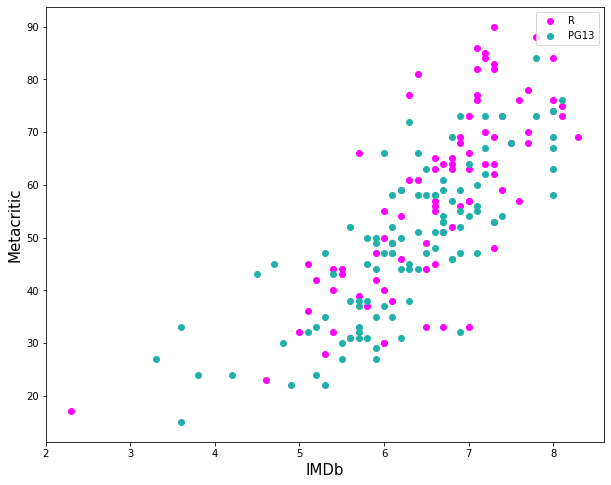

In [3]:
X = df[['IMDb','Metacritic']].to_numpy()
# Define labeling function
def make_labels(y):
    if y == "R":
        return 0
    else:
        return 1

y = df["Rating"].map(make_labels).to_numpy()

# Plot the data
age = ["R", "PG13"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(age, colors):
    temp_df = df[df.Rating == species]
    ax.scatter(temp_df.IMDb,
               temp_df.Metacritic,
               c = color,
               label = species, 
               )

ax.set_xlabel("IMDb", fontsize = 15)
ax.set_ylabel("Metacritic", fontsize = 15)
ax.legend()
plt.show()

## Runs the data through three testing methods

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        33
           1       0.67      0.53      0.59        57

    accuracy                           0.53        90
   macro avg       0.53      0.54      0.52        90
weighted avg       0.57      0.53      0.54        90
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.45      0.30      0.36        33
           1       0.66      0.79      0.72        57

    accuracy                           0.61        90
   macro avg       0.56      0.55      0.54        90
weighted avg       0.59      0.61      0.59        90
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.45      0.30      0.36        33
           1       0.66      0.79      0.72        57

    accuracy                           0.61        90
   macro avg       0.56      0.55     

## View accuracy of decision regions generated

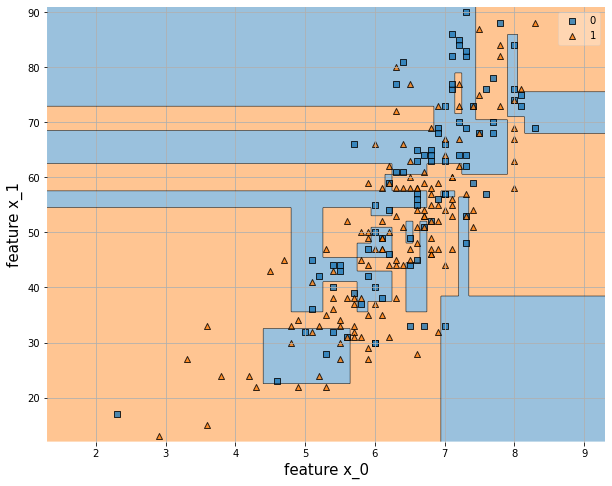

In [5]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

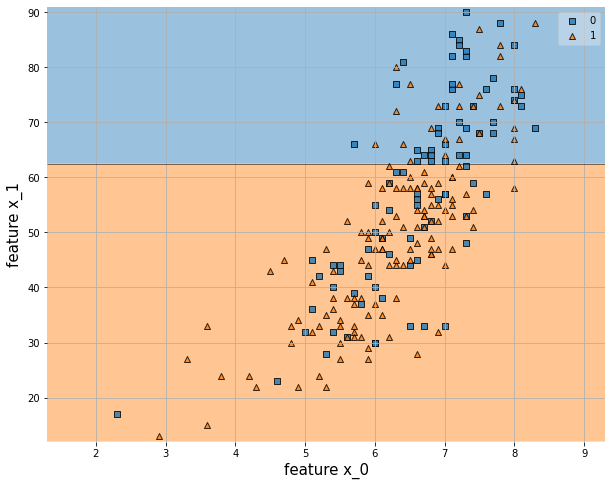

In [6]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

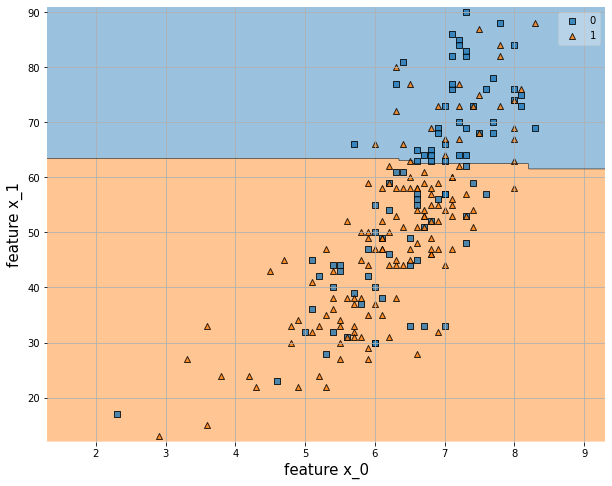

In [7]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [8]:

X = df[["RTCritic", "RTFan", "IMDb", "Metacritic"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.45      0.55      0.49        31
           1       0.73      0.64      0.68        59

    accuracy                           0.61        90
   macro avg       0.59      0.60      0.59        90
weighted avg       0.63      0.61      0.62        90
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.45      0.29      0.35        31
           1       0.69      0.81      0.74        59

    accuracy                           0.63        90
   macro avg       0.57      0.55      0.55        90
weighted avg       0.60      0.63      0.61        90
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.45      0.29      0.35        31
           1       0.69      0.81      0.74        59

    accuracy                           0.63        90
   macro avg       0.57      0.55     

In [9]:
names = ["RTCritic", "RTFan", "IMDb", "Metacritic"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

RTCritic 0.244
RTFan 0.082
IMDb 0.38
Metacritic 0.294
